In [ ]:
# AGRI DATA PROJECT
#Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
#upload the file
sheet_id="1PHf2rFB53qUu7j8-r4qcHQdrhvxOyiyhyMWIY-nb_m8"
sheet_name="321359364"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
agri_df=pd.read_csv(url)

In [6]:
#Data cleaning
agri_df.head() #to view the first five rows

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [7]:
agri_df.shape #to view dimensions of the DataFrame

(16146, 80)

In [8]:
agri_df.isnull().sum() #identify missing (null/NaN) values in each column 

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [9]:
agri_df.duplicated().sum() #detect duplicate rows

np.int64(0)

In [10]:
agri_df.info() #get a quick summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [11]:
agri_df.describe() #summary statistics for numerical columns in dataframe

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.593192,224.889565,1486.924784,77.057946,182.012746,1492.419859,22.632268,...,4500.15306,28.018367,7.229225,124.644823,7.750478,11.086250,18.677877,3.177038,1.194604,21.550328
std,278.309125,15.011185,4.988538,160.078825,326.629828,956.185281,100.394479,348.834254,1081.255367,45.062714,...,3153.97042,74.239648,25.042132,207.681147,13.591135,18.003257,25.881842,8.029509,4.285067,60.062601
min,1.000000,1966.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000,1.770000,2.000000,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,0.310000,1.600000,2.520000,0.000000,0.060000,0.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000,36.800000,42.700000,1347.450000,2.050000,...,4502.21000,0.050000,0.000000,0.000000,2.220000,4.740000,8.945000,0.390000,0.280000,1.200000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500,123.000000,215.192500,2131.580000,20.900000,...,6704.60500,10.097500,2.000000,202.270000,8.790000,12.510000,23.570000,3.150000,0.880000,16.762500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.30000,800.890000,376.610000,5000.000000,159.540000,200.060000,240.990000,111.610000,131.350000,1162.660000


In [12]:
agri_df.columns.tolist() # list of all column names in data frame

['Dist Code',
 'Year',
 'State Code',
 'State Name',
 'Dist Name',
 'RICE AREA (1000 ha)',
 'RICE PRODUCTION (1000 tons)',
 'RICE YIELD (Kg per ha)',
 'WHEAT AREA (1000 ha)',
 'WHEAT PRODUCTION (1000 tons)',
 'WHEAT YIELD (Kg per ha)',
 'KHARIF SORGHUM AREA (1000 ha)',
 'KHARIF SORGHUM PRODUCTION (1000 tons)',
 'KHARIF SORGHUM YIELD (Kg per ha)',
 'RABI SORGHUM AREA (1000 ha)',
 'RABI SORGHUM PRODUCTION (1000 tons)',
 'RABI SORGHUM YIELD (Kg per ha)',
 'SORGHUM AREA (1000 ha)',
 'SORGHUM PRODUCTION (1000 tons)',
 'SORGHUM YIELD (Kg per ha)',
 'PEARL MILLET AREA (1000 ha)',
 'PEARL MILLET PRODUCTION (1000 tons)',
 'PEARL MILLET YIELD (Kg per ha)',
 'MAIZE AREA (1000 ha)',
 'MAIZE PRODUCTION (1000 tons)',
 'MAIZE YIELD (Kg per ha)',
 'FINGER MILLET AREA (1000 ha)',
 'FINGER MILLET PRODUCTION (1000 tons)',
 'FINGER MILLET YIELD (Kg per ha)',
 'BARLEY AREA (1000 ha)',
 'BARLEY PRODUCTION (1000 tons)',
 'BARLEY YIELD (Kg per ha)',
 'CHICKPEA AREA (1000 ha)',
 'CHICKPEA PRODUCTION (1000 tons

In [13]:
# Function to clean column names
def clean_column(col):
    col = col.strip()  # remove leading/trailing whitespace
    col = col.lower()  # lowercase everything
    col = re.sub(r"\(.*?\)", "", col)  # remove anything in parentheses like (1000 ha)
    col = col.replace(" ", "_")  # replace spaces with underscores
    col = re.sub(r"[^a-z0-9_]", "", col)  # remove any remaining special characters
    return col.rstrip('_')

# Apply the cleaning function
agri_df.columns = [clean_column(col) for col in agri_df.columns]

# Show result
print(agri_df.columns)

Index(['dist_code', 'year', 'state_code', 'state_name', 'dist_name',
       'rice_area', 'rice_production', 'rice_yield', 'wheat_area',
       'wheat_production', 'wheat_yield', 'kharif_sorghum_area',
       'kharif_sorghum_production', 'kharif_sorghum_yield',
       'rabi_sorghum_area', 'rabi_sorghum_production', 'rabi_sorghum_yield',
       'sorghum_area', 'sorghum_production', 'sorghum_yield',
       'pearl_millet_area', 'pearl_millet_production', 'pearl_millet_yield',
       'maize_area', 'maize_production', 'maize_yield', 'finger_millet_area',
       'finger_millet_production', 'finger_millet_yield', 'barley_area',
       'barley_production', 'barley_yield', 'chickpea_area',
       'chickpea_production', 'chickpea_yield', 'pigeonpea_area',
       'pigeonpea_production', 'pigeonpea_yield', 'minor_pulses_area',
       'minor_pulses_production', 'minor_pulses_yield', 'groundnut_area',
       'groundnut_production', 'groundnut_yield', 'sesamum_area',
       'sesamum_production', 'sesa

#EDA

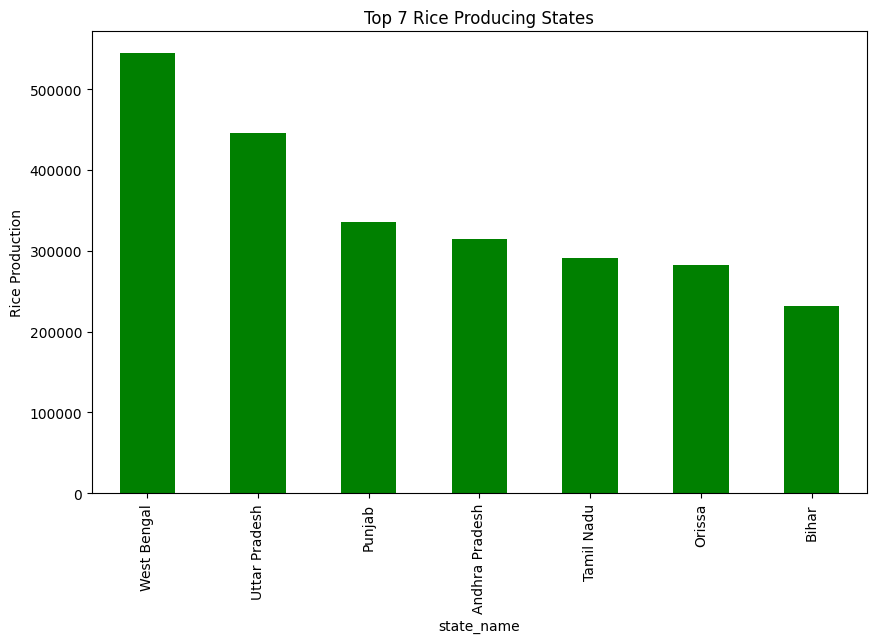

In [14]:
#Top 7 RICE PRODUCTION State Data(Bar_plot)

top_7_rice_state = agri_df.groupby('state_name')['rice_production'].sum().sort_values(ascending=False).head(7)
top_7_rice_state.plot(kind='bar', figsize=(10,6), color='green', title='Top 7 Rice Producing States')
plt.ylabel('Rice Production')
plt.show()

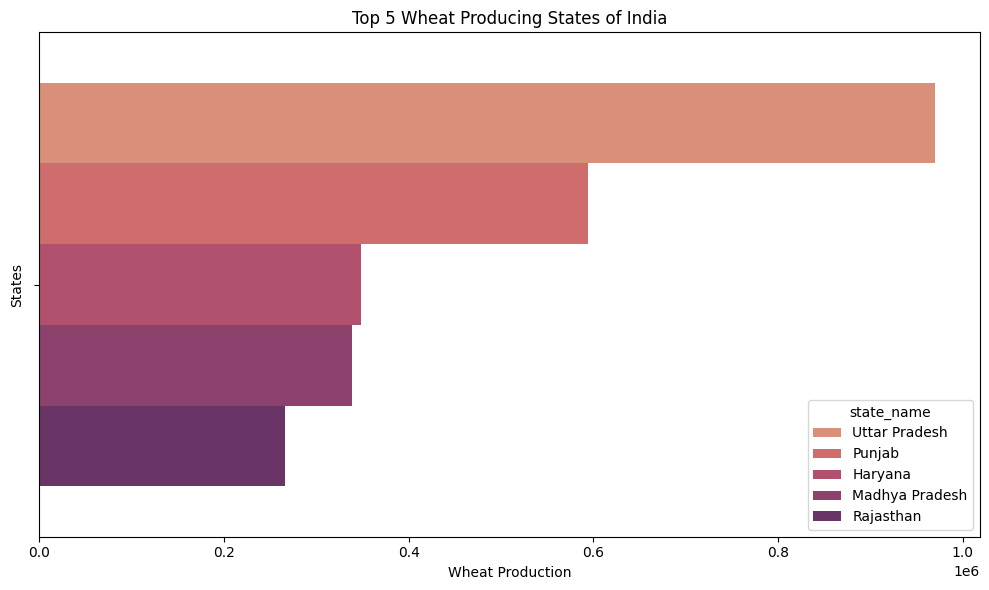

In [15]:
#Top 5 Wheat Producing States Data(Bar_chart)
top_5_wheat_states = agri_df.groupby('state_name')['wheat_production'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_wheat_states.values,hue=top_5_wheat_states.index,palette="flare")
plt.title("Top 5 Wheat Producing States of India")
plt.xlabel("Wheat Production")
plt.ylabel("States")
plt.tight_layout()
plt.show()

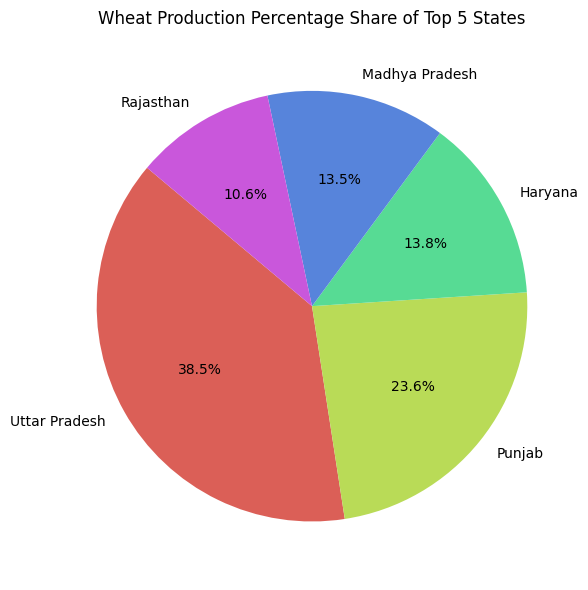

In [16]:
# Top 5 Wheat Producing States Data percentage(%)(Pie_chart)
top_wheat_states = agri_df.groupby('state_name')['wheat_production'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6, 6))
plt.pie(top_wheat_states.values,
        labels=top_wheat_states.index,
        autopct='%1.1f%%',  # Shows percentage
        startangle=140,
        colors=sns.color_palette('hls', n_colors=5))

plt.title('Wheat Production Percentage Share of Top 5 States')
plt.axis('equal')  # Equal aspect ratio 
plt.tight_layout()
plt.show()

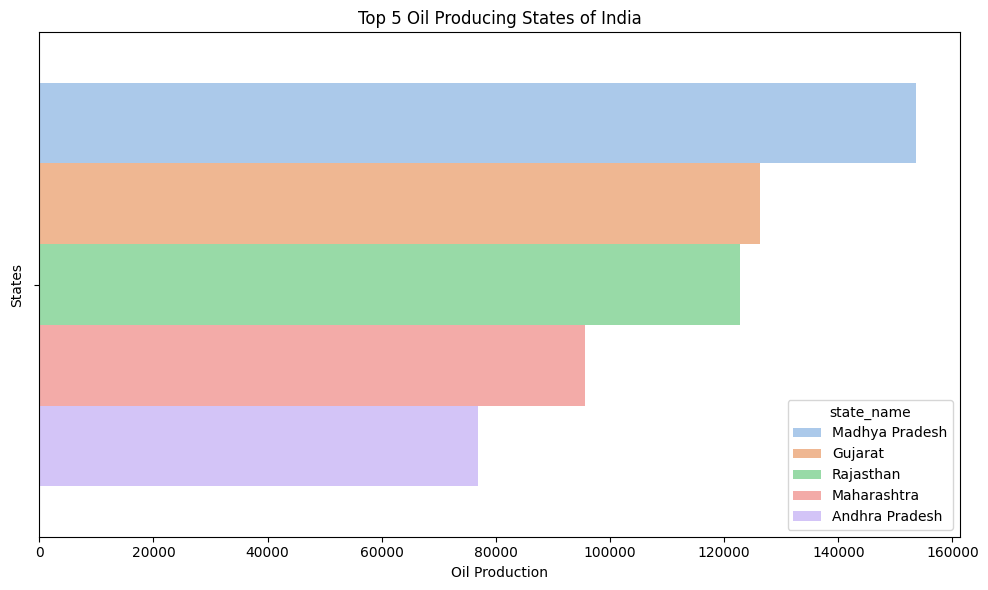

In [17]:
#Oil seed production by top 5 states
top_5_oil_states = agri_df.groupby('state_name')['oilseeds_production'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_oil_states.values,hue=top_5_oil_states.index,palette="pastel")
plt.title("Top 5 Oil Producing States of India")
plt.xlabel("Oil Production")
plt.ylabel("States")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top 7 Sunflower Producing States'}, xlabel='state_name'>

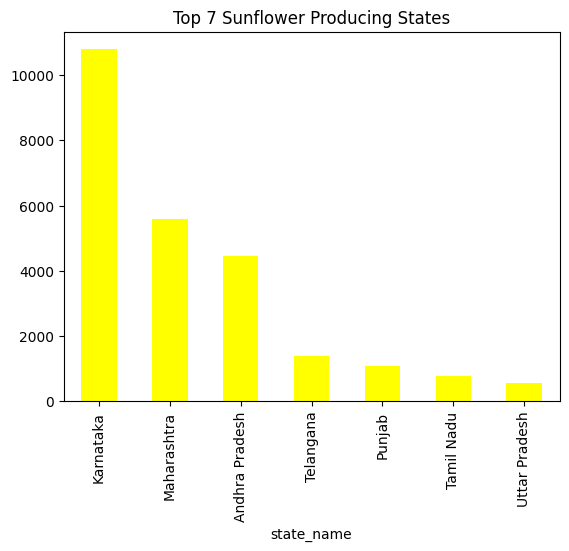

In [18]:
#Top 7 SUNFLOWER PRODUCTION State

top_sunflower = agri_df.groupby('state_name')['sunflower_production'].sum().sort_values(ascending=False).head(7)
top_sunflower.plot(kind='bar',  color='yellow', title='Top 7 Sunflower Producing States')

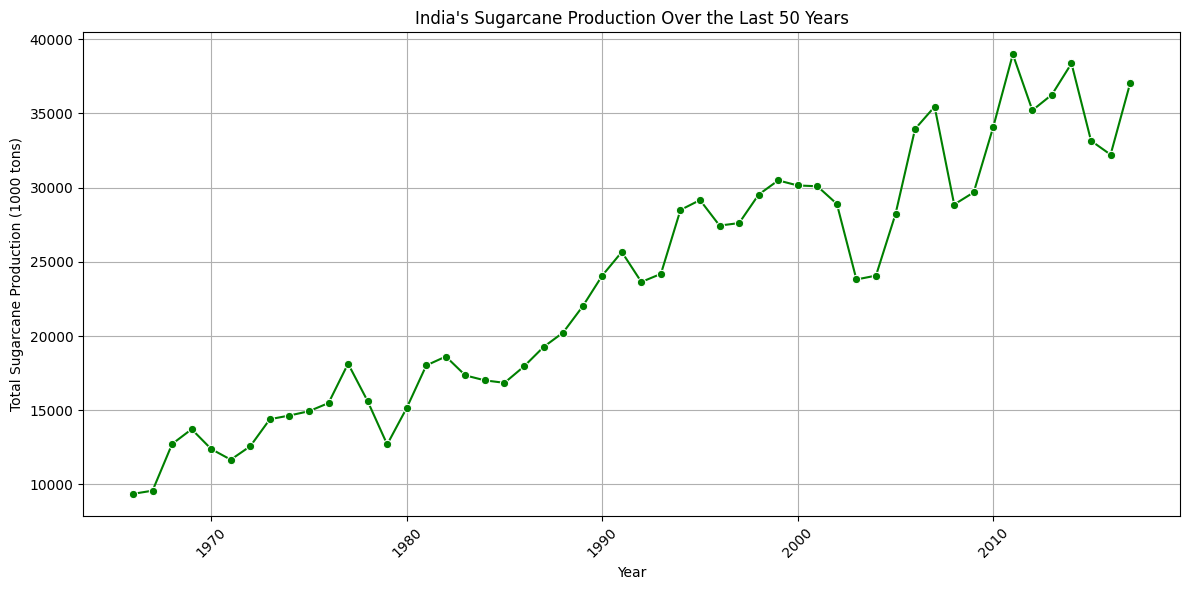

In [19]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcane_trend = agri_df.groupby('year')['sugarcane_production'].sum().reset_index()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sugarcane_trend, x='year', y='sugarcane_production', marker='o', color='green')

plt.title("India's Sugarcane Production Over the Last 50 Years")
plt.xlabel("Year")
plt.ylabel("Total Sugarcane Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

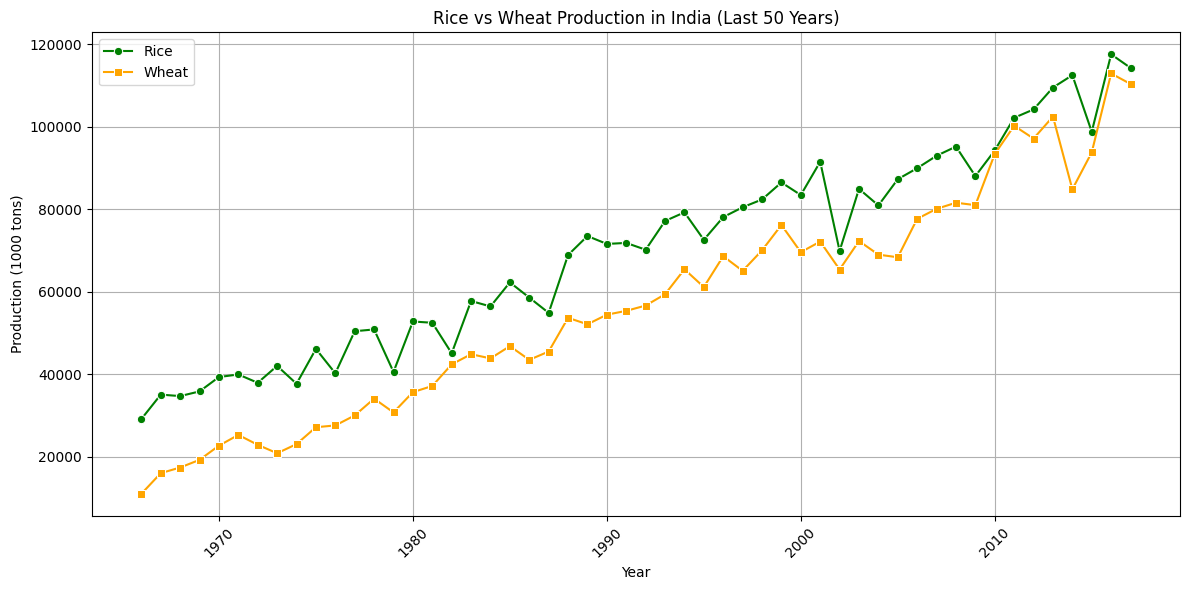

In [20]:
#Rice Production Vs Wheat Production (Last 50y)
rice_vs_wheat_trend = agri_df.groupby('year')[['rice_production', 'wheat_production']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=rice_vs_wheat_trend, x='year', y='rice_production', label='Rice', marker='o', color='green')
sns.lineplot(data=rice_vs_wheat_trend, x='year', y='wheat_production', label='Wheat', marker='s', color='orange')

plt.title('Rice vs Wheat Production in India (Last 50 Years)')
plt.xlabel('Year')
plt.ylabel('Production (1000 tons)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

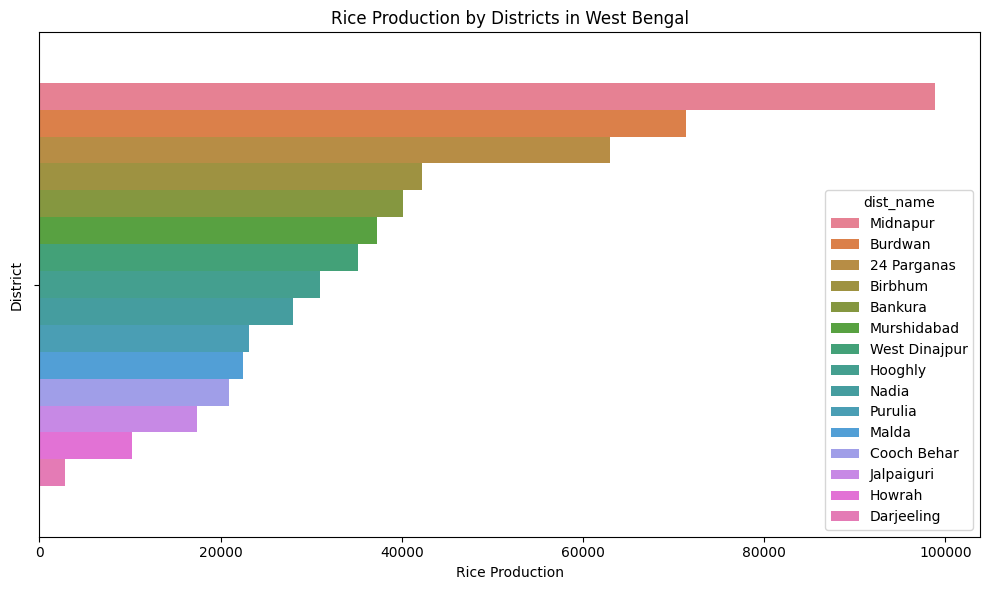

In [21]:
#Rice Production By West Bengal Districts
west_bengal_rice = agri_df[agri_df['state_name']=='West Bengal']
rice_by_district  = west_bengal_rice.groupby('dist_name')['rice_production'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=rice_by_district.values,hue=rice_by_district.index)
plt.title("Rice Production by Districts in West Bengal")
plt.xlabel("Rice Production")
plt.ylabel("District")
plt.tight_layout()
plt.show()

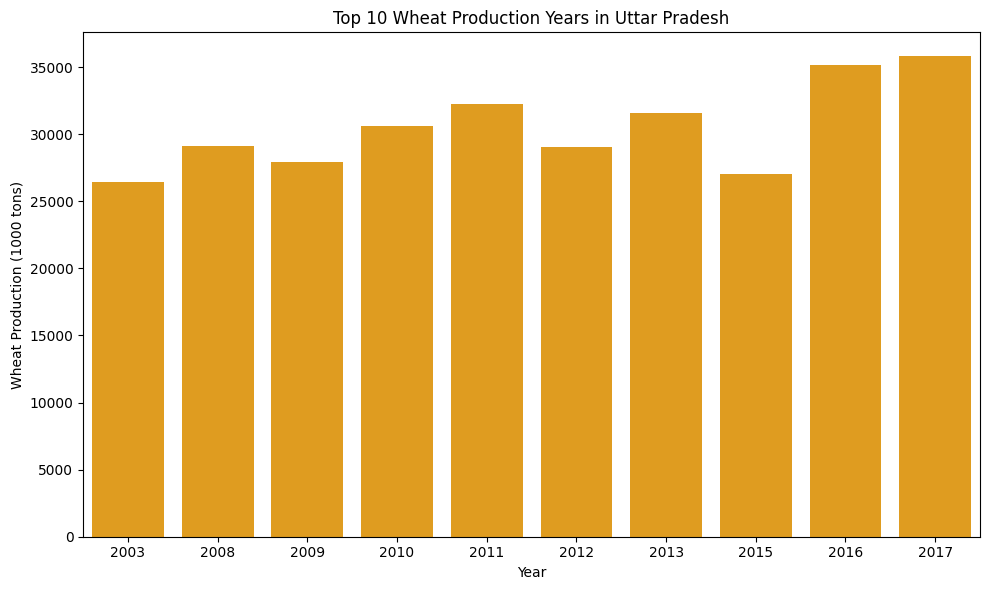

In [22]:
#Top 10 Wheat Production Years From UP
up_wheat = agri_df[agri_df['state_name']=='Uttar Pradesh']
wheat_by_district  = up_wheat.groupby('year')['wheat_production'].sum().sort_values(ascending=False).head(10)
wheat_by_district = wheat_by_district.sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=wheat_by_district.index.astype(str),y=wheat_by_district.values,color="orange")
plt.title("Top 10 Wheat Production Years in Uttar Pradesh")
plt.xlabel("Year")
plt.ylabel("Wheat Production (1000 tons)")
plt.tight_layout()
plt.show()

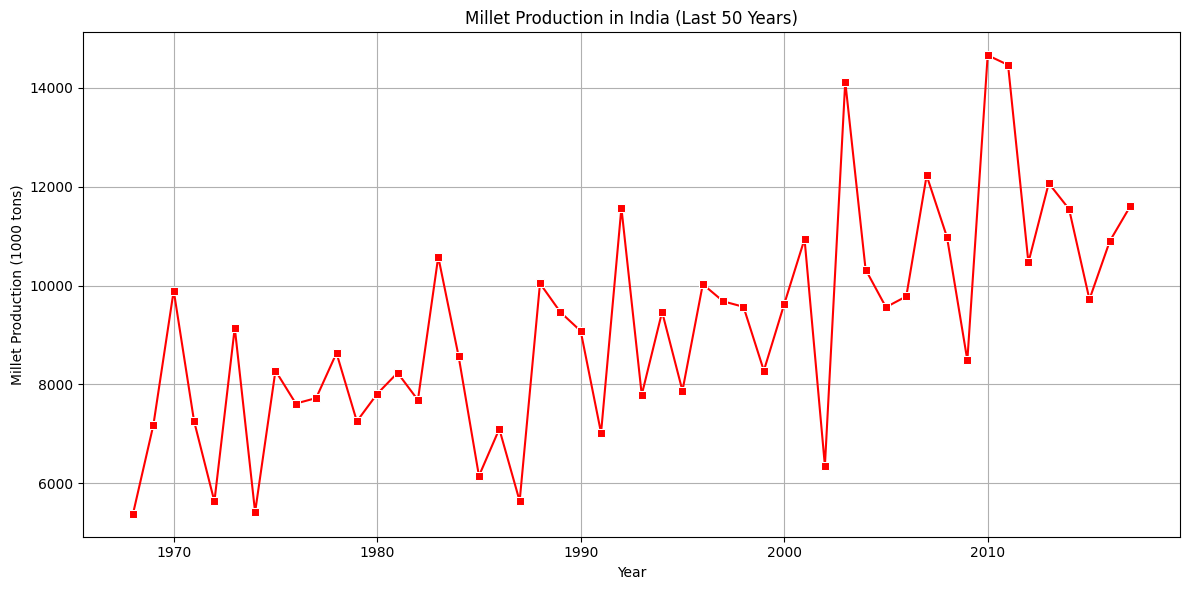

In [23]:
#Millet Production (Last 50y)
agri_df['millets_production_(1000_tons)'] = (agri_df['pearl_millet_production'] +agri_df['finger_millet_production'])
millets_by_year = agri_df.groupby('year')['millets_production_(1000_tons)'].sum().reset_index().sort_values('year')

if len(millets_by_year) > 50:
    millets_by_year = millets_by_year.tail(50)

plt.figure(figsize=(12,6))
sns.lineplot(data=millets_by_year,x="year",y="millets_production_(1000_tons)",marker='s',color='red')
plt.title("Millet Production in India (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Millet Production (1000 tons)")
plt.grid(True)
plt.tight_layout()
plt.show()

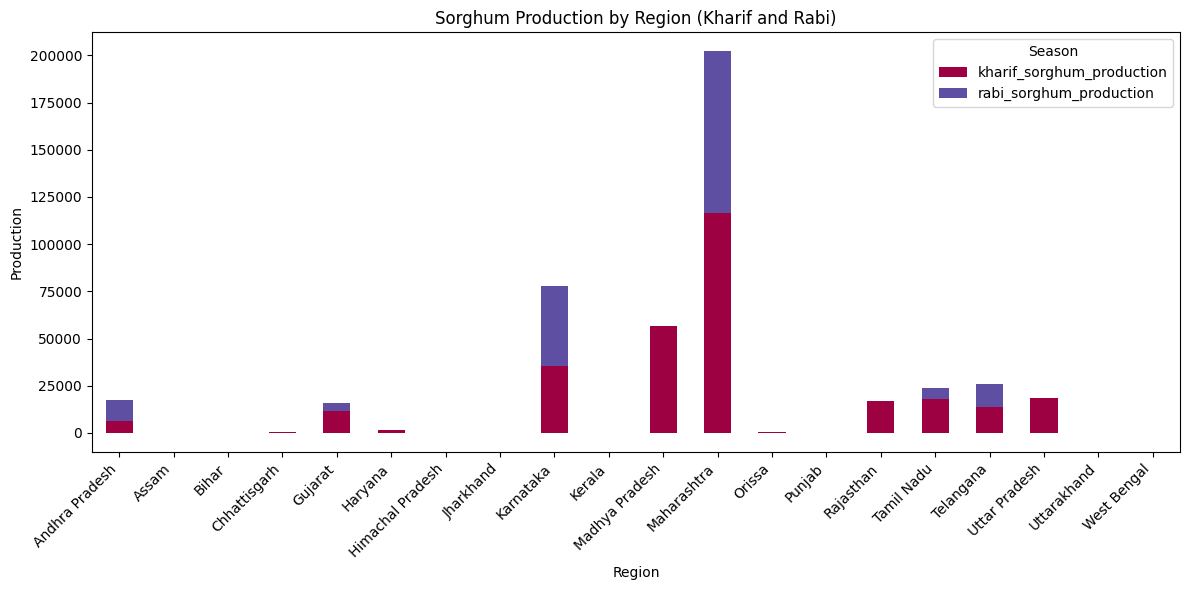

In [24]:
#Sorghum Production (Kharif and Rabi) by Region
sorghum_by_state = agri_df.groupby('state_name')[['kharif_sorghum_production', 'rabi_sorghum_production']].sum()
#Plotting stacked bar chart
sorghum_by_state.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Spectral')

plt.title("Sorghum Production by Region (Kharif and Rabi)")
plt.xlabel("Region")
plt.ylabel("Production")
plt.legend(title="Season")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

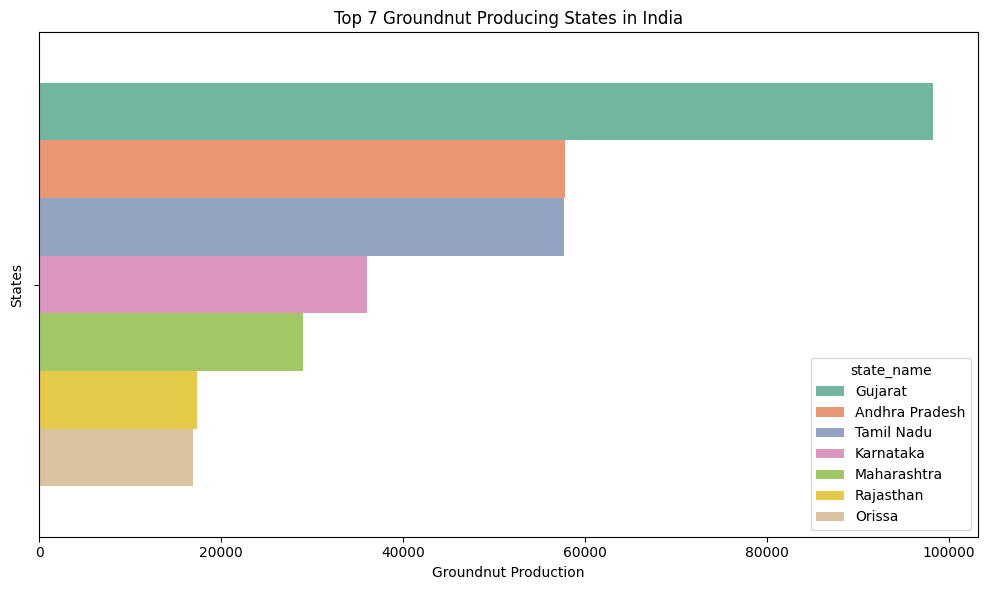

In [25]:
#Top 7 States for Groundnut Production
top_7_groundnut_states = agri_df.groupby('state_name')['groundnut_production'].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,6))
sns.barplot(x=top_7_groundnut_states.values,hue=top_7_groundnut_states.index,palette="Set2")
plt.title("Top 7 Groundnut Producing States in India")
plt.xlabel("Groundnut Production")
plt.ylabel("States")
plt.tight_layout()
plt.show()

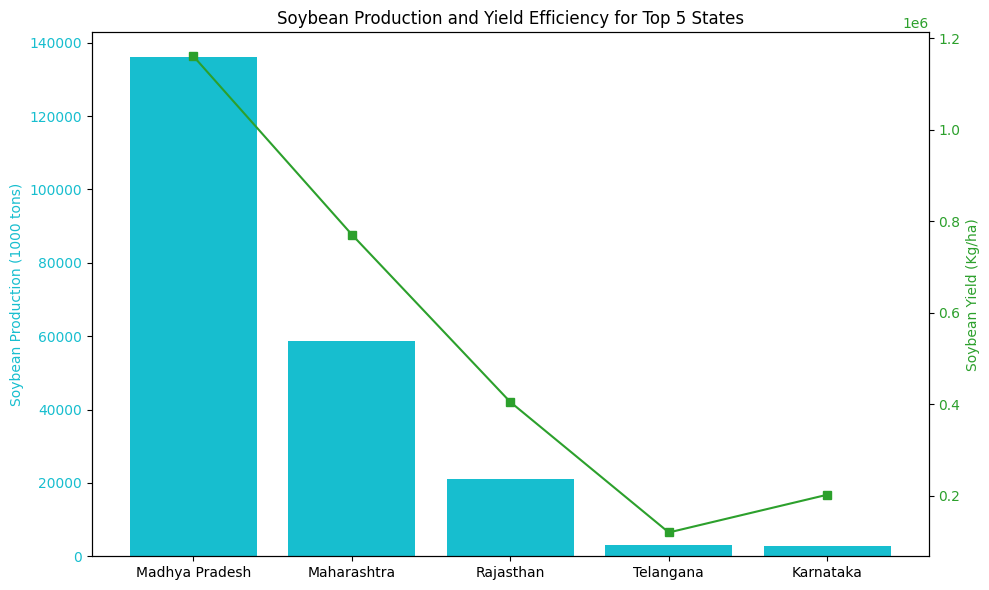

In [29]:
#Soybean Production by Top 5 States and Yield Efficiency
soybean_df = agri_df.groupby('state_name')[['soyabean_production', 'soyabean_yield']].sum()
top_soy_states = soybean_df.sort_values(by='soyabean_production', ascending=False).head(5)

# Dual axis bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:cyan'
ax1.bar(top_soy_states.index, top_soy_states['soyabean_production'], color=color)
ax1.set_ylabel('Soybean Production (1000 tons)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Second y-axis
color = 'tab:green'
ax2.plot(top_soy_states.index, top_soy_states['soyabean_yield'], color=color, marker='s')
ax2.set_ylabel('Soybean Yield (Kg/ha)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Soybean Production and Yield Efficiency for Top 5 States')
plt.tight_layout()
plt.show()

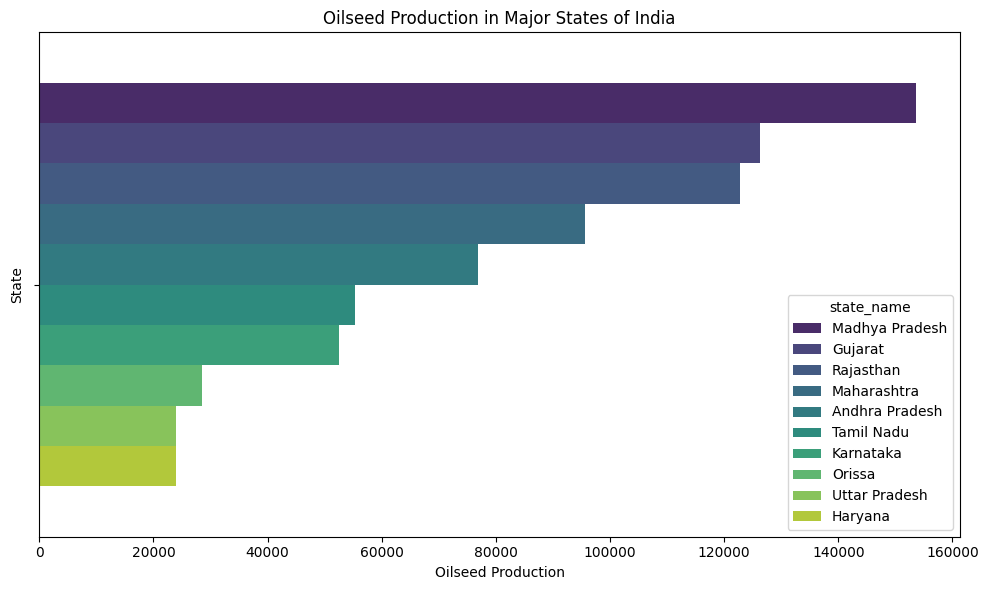

In [30]:
#Oilseed Production in Major States
oilseed_by_state  = agri_df.groupby('state_name')['oilseeds_production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=oilseed_by_state .values,hue=oilseed_by_state .index, palette='viridis')
plt.title("Oilseed Production in Major States of India")
plt.xlabel("Oilseed Production")
plt.ylabel("State")
plt.tight_layout()
plt.show()

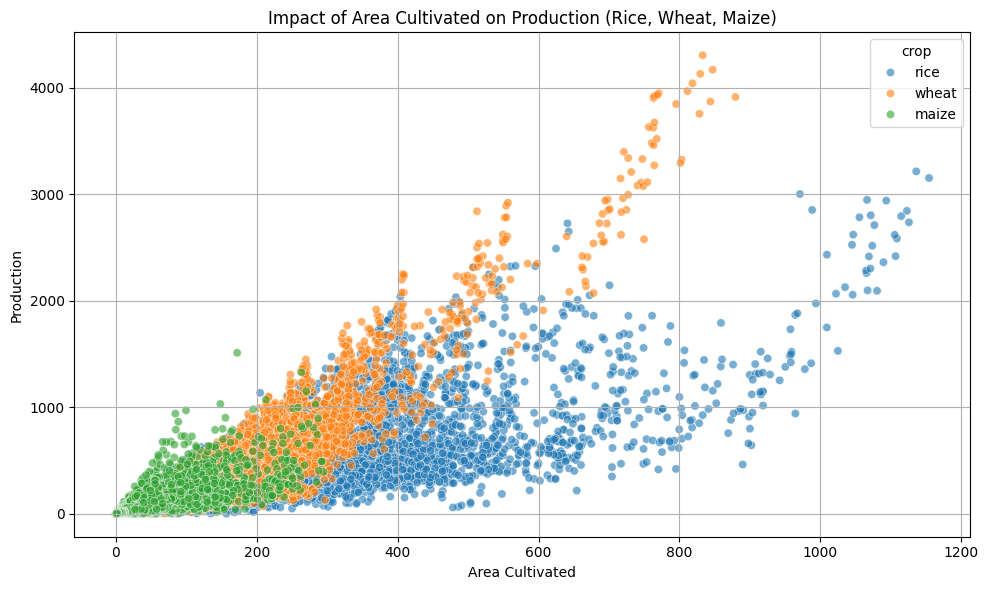

In [31]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
data = pd.DataFrame({
    'crop': ['rice'] * len(agri_df) + ['wheat'] * len(agri_df) + ['maize'] * len(agri_df),
    'area_(1000_ha)': pd.concat([agri_df['rice_area'], agri_df['wheat_area'], agri_df['maize_area']]),
    'production_(1000_tons)': pd.concat([agri_df['rice_production'], agri_df['wheat_production'], agri_df['maize_production']])})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area_(1000_ha)', y='production_(1000_tons)', hue='crop', alpha=0.6)
plt.title("Impact of Area Cultivated on Production (Rice, Wheat, Maize)")
plt.xlabel("Area Cultivated")
plt.ylabel("Production")
plt.grid(True)
plt.tight_layout()
plt.show()

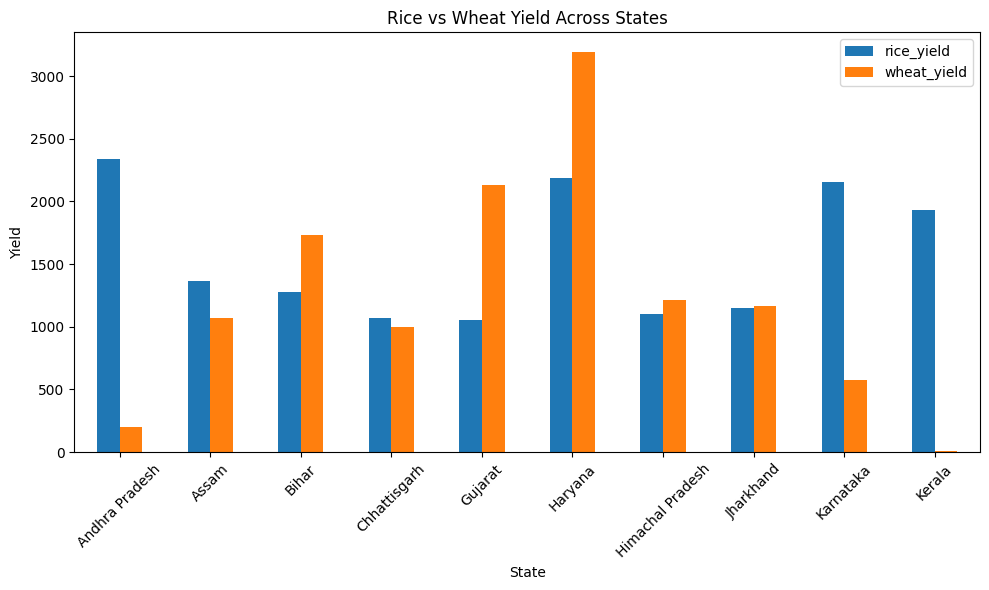

In [32]:
#Rice vs. Wheat Yield Across States
yield_df = agri_df.groupby('state_name')[['rice_yield','wheat_yield']].mean().head(10)

yield_df.plot(kind='bar', figsize=(10, 6))
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
#SQL Connection
import pymysql
from datetime import datetime
connection = pymysql.connect(
    host="localhost",  
    port=3306, 
    user="root",
    password="Yuvi143thari",
    database="agridata", 
    autocommit=True
)
cursor = connection.cursor()

In [40]:
query="""CREATE TABLE IF NOT EXISTS agridata (
    dist_code INT,
    year INT,
    state_code INT,
    state_name VARCHAR(100),
    dist_name VARCHAR(100),
    rice_area FLOAT,
    rice_production FLOAT,
    rice_yield FLOAT,
    wheat_area FLOAT,
    wheat_production FLOAT,
    wheat_yield FLOAT,
    maize_area FLOAT,
    maize_production FLOAT,
    maize_yield FLOAT,
    groundnut_production FLOAT,
    oilseeds_area FLOAT,
    oilseeds_production FLOAT,
    oilseeds_yield FLOAT,
    cotton_production FLOAT,
    cotton_area FLOAT,
    cotton_yield FLOAT
)
"""
cursor.execute(query)

0

In [42]:
cursor.execute("SELECT COUNT(*) FROM agridata")
result = cursor.fetchone()

if result[0] == 0:
    df = pd.read_csv(url)
    #Replace missing values
    df.fillna(0, inplace=True)
    #Convert DataFrame to list of tuples
    data = df.values.tolist()
    new_data = []

    for row in data:
        new_row = (
            int(row[0]),     # dist_code
            int(row[1]),     # year
            int(row[2]),     # state_code
            str(row[3]),     # state_name
            str(row[4]),     # dist_name
            float(row[5]),   # rice_area
            float(row[6]),   # rice_production
            float(row[7]),   # rice_yield
            float(row[8]),   # wheat_area
            float(row[9]),   # wheat_production
            float(row[10]),  # wheat_yield
            float(row[11]),  # maize_area
            float(row[12]),  # maize_production
            float(row[13]),  # maize_yield
            float(row[14]),  # groundnut_production
            float(row[15]),  # oilseeds_area
            float(row[16]),  # oilseeds_production
            float(row[17]),  # oilseeds_yield
            float(row[18]),  # cotton_production
            float(row[19]),  # cotton_area
            float(row[20])   # cotton_yield
        )
        new_data.append(new_row)

    # Step 6: Insert into MySQL
    query = """
        INSERT INTO agridata VALUES (
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
            %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
        )
    """
    cursor.executemany(query, new_data)
    connection.commit()
    print("Data inserted successfully.")
else:
    print("Table already has data.")

Data inserted successfully.


In [44]:
#Year-wise Trend of Rice Production Across States (Top 3)
query = """
SELECT a.year, a.state_name, a.total_production
FROM (
    SELECT 
        year, 
        state_name, 
        SUM(rice_production) AS total_production
    FROM agridata
    GROUP BY year, state_name
) a
WHERE (
    SELECT COUNT(*) 
    FROM (
        SELECT 
            year, 
            state_name, 
            SUM(rice_production) AS total_production
        FROM agridata
        GROUP BY year, state_name
    ) b
    WHERE b.year = a.year AND b.total_production > a.total_production
) < 3
ORDER BY a.year, a.total_production DESC;

"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

(1966, 'West Bengal', 4819.400035858154)
(1966, 'Tamil Nadu', 3793.0)
(1966, 'Orissa', 3691.7899627685547)
(1967, 'West Bengal', 4865.770025253296)
(1967, 'Tamil Nadu', 3848.0)
(1967, 'Orissa', 3755.4700508117676)
(1968, 'West Bengal', 5461.489948272705)
(1968, 'Orissa', 3951.5599784851074)
(1968, 'Tamil Nadu', 3549.0)
(1969, 'West Bengal', 5362.820011138916)
(1969, 'Tamil Nadu', 4011.899926662445)
(1969, 'Orissa', 3949.0900230407715)
(1970, 'West Bengal', 5209.069995880127)
(1970, 'Tamil Nadu', 5006.900027513504)
(1970, 'Orissa', 3831.5)
(1971, 'Tamil Nadu', 5302.099951267242)
(1971, 'West Bengal', 4965.099994659424)
(1971, 'Bihar', 3854.0200271606445)
(1972, 'Tamil Nadu', 5569.30007648468)
(1972, 'West Bengal', 5310.029983520508)
(1972, 'Orissa', 3983.1199951171875)
(1973, 'Tamil Nadu', 5558.299912929535)
(1973, 'West Bengal', 5456.2099685668945)
(1973, 'Orissa', 4404.360046386719)
(1974, 'West Bengal', 6223.329921722412)
(1974, 'Andhra Pradesh', 4133.799987792969)
(1974, 'Tamil Nadu

In [45]:
#Top 5 Districts by Wheat Yield Increase Over the Last 5 Years
query= """
WITH recent_years AS (
    SELECT DISTINCT year FROM agridata ORDER BY year DESC LIMIT 5
),
wheat_data AS (
    SELECT dist_name, state_name, year, wheat_yield
    FROM agridata
    WHERE year IN (SELECT year FROM recent_years)
),
pivoted AS (
    SELECT
        dist_name,
        state_name,
        MAX(CASE WHEN year = (SELECT MIN(year) FROM recent_years) THEN wheat_yield END) AS yield_start,
        MAX(CASE WHEN year = (SELECT MAX(year) FROM recent_years) THEN wheat_yield END) AS yield_end
    FROM wheat_data
    GROUP BY dist_name, state_name
)
SELECT
    dist_name,
    state_name,
    yield_start,
    yield_end,
    (yield_end - yield_start) AS yield_increase
FROM pivoted
WHERE yield_start IS NOT NULL AND yield_end IS NOT NULL
ORDER BY yield_increase DESC
LIMIT 5;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

('Chamba', 'Himachal Pradesh', 676.3400268554688, 2691.780029296875, 2015.4400024414062)
('Vidisha', 'Madhya Pradesh', 2084.85009765625, 3900.0, 1815.14990234375)
('Dewas', 'Madhya Pradesh', 2299.469970703125, 4100.02001953125, 1800.550048828125)
('Damoh', 'Madhya Pradesh', 1854.4300537109375, 3500.0, 1645.5699462890625)
('Darjeeling', 'West Bengal', 1425.0, 3011.6298828125, 1586.6298828125)


In [47]:
#States with the Highest Growth in Oilseed Production (5-Year Growth Rate)
query = """
WITH recent_years AS (
    SELECT DISTINCT year FROM agridata ORDER BY year DESC LIMIT 5
),
oilseed_summary AS (
    SELECT state_name, year, SUM(oilseeds_production) AS total_production
    FROM agridata
    WHERE year IN (SELECT year FROM recent_years)
    GROUP BY state_name, year
),
pivoted AS (
    SELECT
        state_name,
        MAX(CASE WHEN year = (SELECT MIN(year) FROM recent_years) THEN total_production END) AS production_start,
        MAX(CASE WHEN year = (SELECT MAX(year) FROM recent_years) THEN total_production END) AS production_end
    FROM oilseed_summary
    GROUP BY state_name
)
SELECT
    state_name,
    production_start,
    production_end,
    ROUND(((production_end - production_start) / production_start) * 100, 2) AS growth_rate_percent
FROM pivoted
WHERE production_start IS NOT NULL AND production_end IS NOT NULL
ORDER BY growth_rate_percent DESC
LIMIT 5;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

('Telangana', 8168.380126953125, 12094.510070800781, 48.06)
('Gujarat', 11669.289916992188, 15293.799926757812, 31.06)
('Maharashtra', 15639.349975585938, 15651.010009765625, 0.07)
('Karnataka', 15275.619934082031, 14498.52001953125, -5.09)
('Andhra Pradesh', 37715.49008178711, 28051.339965820312, -25.62)


In [49]:
#District-wise Correlation Between Area and Production for Rice, Wheat, and Maize
query= """
SELECT
    dist_name,
    state_name,
    (
        (COUNT(*) * SUM(rice_production * rice_area) - SUM(rice_production) * SUM(rice_area)) /
        (SQRT(COUNT(*) * SUM(rice_production * rice_production) - POWER(SUM(rice_production), 2)) *
         SQRT(COUNT(*) * SUM(rice_area * rice_area) - POWER(SUM(rice_area), 2)))
    ) AS rice_corr
FROM agridata
WHERE rice_production IS NOT NULL AND rice_area IS NOT NULL
GROUP BY dist_name, state_name;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

('Durg', 'Chhattisgarh', 0.8247526311648612)
('Bastar', 'Chhattisgarh', 0.7222068678031145)
('Raipur', 'Chhattisgarh', 0.8140105947604629)
('Bilaspur', 'Chhattisgarh', 0.7486016953177719)
('Raigarh', 'Chhattisgarh', 0.7172137583548325)
('Surguja', 'Chhattisgarh', 0.7688118775229643)
('Jabalpur', 'Madhya Pradesh', 0.7759627563933489)
('Balaghat', 'Madhya Pradesh', 0.7014276454782243)
('Chhindwara', 'Madhya Pradesh', 0.3248879216304745)
('Narsinghpur', 'Madhya Pradesh', 0.9104451333865949)
('Seoni / Shivani', 'Madhya Pradesh', 0.8042044890671861)
('Mandla', 'Madhya Pradesh', 0.6826252490703765)
('Sagar', 'Madhya Pradesh', 0.7866789109944475)
('Damoh', 'Madhya Pradesh', 0.8887896661066637)
('Tikamgarh', 'Madhya Pradesh', 0.6602881631241223)
('Chhatarpur', 'Madhya Pradesh', 0.6771339965619968)
('Panna', 'Madhya Pradesh', 0.5372808423083958)
('Rewa', 'Madhya Pradesh', 0.3277183917338385)
('Sidhi', 'Madhya Pradesh', 0.5758562827683182)
('Satna', 'Madhya Pradesh', 0.6637988481301438)
('Shahdo

In [51]:
#Yearly Production Growth of Cotton in Top 5 Cotton Producing States
query="""WITH total_cotton AS (
    SELECT state_name, SUM(cotton_production) AS total
    FROM agridata
    GROUP BY state_name
    ORDER BY total DESC
    LIMIT 5
),
cotton_trend AS (
    SELECT year, state_name, SUM(cotton_production) AS yearly_production
    FROM agridata
    WHERE state_name IN (SELECT state_name FROM total_cotton)
    GROUP BY year, state_name
)
SELECT * FROM cotton_trend
ORDER BY year, state_name;"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

(1966, 'Karnataka', 1391.4999842643738)
(1966, 'Madhya Pradesh', 1371.5999940931797)
(1966, 'Maharashtra', 3097.2000064849854)
(1966, 'Tamil Nadu', 558.9000093117356)
(1966, 'Telangana', 743.2999992370605)
(1967, 'Karnataka', 1439.900005057454)
(1967, 'Madhya Pradesh', 2042.800004541874)
(1967, 'Maharashtra', 3392.89996547997)
(1967, 'Tamil Nadu', 556.9999836608768)
(1967, 'Telangana', 695.4000091552734)
(1968, 'Karnataka', 1642.3999991416931)
(1968, 'Madhya Pradesh', 1564.2999921441078)
(1968, 'Maharashtra', 3254.300006106496)
(1968, 'Tamil Nadu', 532.5000000149012)
(1968, 'Telangana', 737.0)
(1969, 'Karnataka', 1490.7000019550323)
(1969, 'Madhya Pradesh', 1377.7999930977821)
(1969, 'Maharashtra', 2943.4999769330025)
(1969, 'Tamil Nadu', 617.1999971196055)
(1969, 'Telangana', 840.9000015258789)
(1970, 'Karnataka', 2022.9999891519547)
(1970, 'Madhya Pradesh', 1321.7999984025955)
(1970, 'Maharashtra', 1591.300018504262)
(1970, 'Tamil Nadu', 546.2999981194735)
(1970, 'Telangana', 637.000

In [54]:
#Districts with the Highest Groundnut Production in 2020
query = """
SELECT dist_name, state_name, groundnut_production
FROM agridata
WHERE year = 2017
ORDER BY groundnut_production DESC
LIMIT 5;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

('Solapur', 'Maharashtra', 656.9)
('Ahmednagar', 'Maharashtra', 548.9)
('Beed', 'Maharashtra', 500.3)
('Bijapur / Vijayapura', 'Karnataka', 256.58)
('Gulbarga / Kalaburagi', 'Karnataka', 250.74)


In [55]:
#Annual Average Maize Yield Across All States
query= """
SELECT year, AVG(maize_yield) AS avg_maize_yield
FROM agridata
GROUP BY year
ORDER BY year;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

(1966, 375.088807072178)
(1967, 438.6944826864427)
(1968, 427.8772586514873)
(1969, 432.96077373258527)
(1970, 457.7660766797817)
(1971, 451.4226039383572)
(1972, 492.6889061115179)
(1973, 486.3815759002587)
(1974, 511.1417998470294)
(1975, 529.0762058025005)
(1976, 531.3069118978126)
(1977, 577.0833423160664)
(1978, 573.6613193769547)
(1979, 457.216204646316)
(1980, 505.85736256320376)
(1981, 567.2824771059288)
(1982, 497.57276345525906)
(1983, 593.628489258205)
(1984, 604.472380512397)
(1985, 533.2938590065077)
(1986, 529.3202873748215)
(1987, 516.3080697488938)
(1988, 590.574309554514)
(1989, 658.0500963707829)
(1990, 648.9500632993637)
(1991, 515.248226153466)
(1992, 671.1791294959284)
(1993, 632.7836808512287)
(1994, 570.8458700364636)
(1995, 603.4282234467959)
(1996, 664.7959354087955)
(1997, 605.1571689066013)
(1998, 577.1471056585526)
(1999, 625.3854344726759)
(2000, 566.7392623160047)
(2001, 630.2048555723724)
(2002, 547.8644707946532)
(2003, 747.579163824247)
(2004, 647.69298

In [56]:
#Total Area Cultivated for Oilseeds in Each State
query= """
SELECT state_name, SUM(oilseeds_area) AS total_oilseeds_area
FROM agridata
GROUP BY state_name
ORDER BY total_oilseeds_area DESC;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

('Maharashtra', 85454.83994239755)
('Karnataka', 42753.82998468727)
('Telangana', 11949.329988595098)
('Andhra Pradesh', 11386.80002137646)
('Tamil Nadu', 5532.3400292396545)
('Gujarat', 4333.600010912865)
('Madhya Pradesh', 116.69000096991658)
('Chhattisgarh', 27.30000014603138)
('West Bengal', 0.019999999552965164)
('Rajasthan', 0.0)
('Punjab', 0.0)
('Haryana', 0.0)
('Uttar Pradesh', 0.0)
('Uttarakhand', 0.0)
('Assam', 0.0)
('Kerala', 0.0)
('Orissa', 0.0)
('Bihar', 0.0)
('Jharkhand', 0.0)
('Himachal Pradesh', -40.0)


In [57]:
#Districts with the Highest Rice Yield
query= """
SELECT dist_name, state_name, MAX(rice_yield) AS max_rice_yield
FROM agridata
GROUP BY dist_name, state_name
ORDER BY max_rice_yield DESC
LIMIT 5;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

('Thirunelveli', 'Tamil Nadu', 5653.83)
('Saharsa', 'Bihar', 5542.32)
('Kanyakumari', 'Tamil Nadu', 5421.78)
('Rewa', 'Madhya Pradesh', 5159.93)
('Salem', 'Tamil Nadu', 5129.68)


In [58]:
#Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years
query = """
WITH top_states AS (
    SELECT state_name, SUM(wheat_production + rice_production) AS total_production
    FROM agridata
    GROUP BY state_name
    ORDER BY total_production DESC
    LIMIT 5
)
SELECT
    year,
    state_name,
    SUM(wheat_production) AS total_wheat,
    SUM(rice_production) AS total_rice
FROM agridata
WHERE state_name IN (SELECT state_name FROM top_states)
GROUP BY year, state_name
ORDER BY year, state_name;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)

(1966, 'Haryana', 1104.0, 226.20000000298023)
(1966, 'Madhya Pradesh', 1001.3999996185303, 374.20000042021275)
(1966, 'Punjab', 2519.4000129699707, 338.0)
(1966, 'Uttar Pradesh', 3943.6000118255615, 2473.500019609928)
(1966, 'West Bengal', 45.55000023171306, 4819.400035858154)
(1967, 'Haryana', 1484.0, 293.0)
(1967, 'Madhya Pradesh', 1835.1000003814697, 829.4000004082918)
(1967, 'Punjab', 3403.0, 415.0)
(1967, 'Uttar Pradesh', 5442.400001525879, 2968.9999972581863)
(1967, 'West Bengal', 70.71999910473824, 4865.770025253296)
(1968, 'Haryana', 1622.6000061035156, 277.5)
(1968, 'Madhya Pradesh', 1953.7999992370605, 668.6000000089407)
(1968, 'Punjab', 4538.700000762939, 469.5)
(1968, 'Uttar Pradesh', 5578.000020980835, 2607.1000185608864)
(1968, 'West Bengal', 127.36000129207969, 5461.489948272705)
(1969, 'Haryana', 2213.0, 372.19999980926514)
(1969, 'Madhya Pradesh', 2250.199993133545, 921.2000122442842)
(1969, 'Punjab', 4981.799995422363, 534.5999999046326)
(1969, 'Uttar Pradesh', 6043.9